In [1]:
# Import python packages
import numpy as np
import pandas as pd
import scipy as sp
import sklearn as sk
import seaborn as sns
import matplotlib.pyplot as plt
import regex as re
import os

# Check version numbers
print(f'numpy: {np.version.version}')
print(f'pandas: {pd.__version__}')
print(f'scipy: {sp.__version__}')
print(f'scikit-learn: {sk.__version__}')
print(f'seaborn: {sns.__version__}')

numpy: 2.3.2
pandas: 2.3.1
scipy: 1.16.1
scikit-learn: 1.7.1
seaborn: 0.13.2


In [2]:
os.chdir("../data")
print(os.getcwd())

/workspaces/4Geeks_final_project/data


In [3]:
df = pd.read_csv("clean_superstore_dataset.csv", encoding='latin1')

df.head()

,Row_ID,Order_Date,Sales,Turnaround_Time,Customer_Name_encoded,City_encoded,State_encoded,Postal_Code_encoded,Product_ID_encoded,Ship_Mode_first class,...,Sub_Category_envelopes,Sub_Category_fasteners,Sub_Category_furnishings,Sub_Category_labels,Sub_Category_machines,Sub_Category_paper,Sub_Category_phones,Sub_Category_storage,Sub_Category_supplies,Sub_Category_tables
0,1,1.510099e+09,261.9600,-259200.0,166,194,15,215,12,False,...,False,False,False,False,False,False,False,False,False,False
1,2,1.510099e+09,731.9400,-259200.0,166,194,15,215,55,False,...,False,False,False,False,False,False,False,False,False,False
2,3,1.497226e+09,14.6200,-345600.0,201,265,3,513,946,False,...,False,False,False,True,False,False,False,False,False,False
3,4,1.476144e+09,957.5775,-604800.0,687,153,8,168,319,False,...,False,False,False,False,False,False,False,False,False,True
4,5,1.476144e+09,22.3680,-604800.0,687,153,8,168,1316,False,...,False,False,False,False,False,False,False,True,False,False


In [4]:
from sklearn.model_selection import train_test_split

X = df.drop("Sales", axis = 1)
y = df["Sales"]

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42, train_size = 0.80)

In [5]:
X.head()

,Row_ID,Order_Date,Turnaround_Time,Customer_Name_encoded,City_encoded,State_encoded,Postal_Code_encoded,Product_ID_encoded,Ship_Mode_first class,Ship_Mode_same day,...,Sub_Category_envelopes,Sub_Category_fasteners,Sub_Category_furnishings,Sub_Category_labels,Sub_Category_machines,Sub_Category_paper,Sub_Category_phones,Sub_Category_storage,Sub_Category_supplies,Sub_Category_tables
0,1,1.510099e+09,-259200.0,166,194,15,215,12,False,False,...,False,False,False,False,False,False,False,False,False,False
1,2,1.510099e+09,-259200.0,166,194,15,215,55,False,False,...,False,False,False,False,False,False,False,False,False,False
2,3,1.497226e+09,-345600.0,201,265,3,513,946,False,False,...,False,False,False,True,False,False,False,False,False,False
3,4,1.476144e+09,-604800.0,687,153,8,168,319,False,False,...,False,False,False,False,False,False,False,False,False,True
4,5,1.476144e+09,-604800.0,687,153,8,168,1316,False,False,...,False,False,False,False,False,False,False,True,False,False


In [6]:
y

0       261.9600
1       731.9400
2        14.6200
3       957.5775
4        22.3680
          ...   
9795      3.7980
9796     10.3680
9797    235.1880
9798     26.3760
9799     10.3840
Name: Sales, Length: 9800, dtype: float64

In [7]:
from xgboost import XGBRegressor

model = XGBRegressor(random_state = 42)
model.fit(X_train, y_train)

,objective,'reg:squarederror'
,base_score,None
,booster,None
,callbacks,None
,colsample_bylevel,None
,colsample_bynode,None
,colsample_bytree,None
,device,None
,early_stopping_rounds,None
,enable_categorical,False
,eval_metric,None


In [8]:
y_pred = model.predict(X_test)
y_pred

array([115.45881 ,  98.73141 , 440.39343 , ...,  37.210354, -77.64975 ,
       271.9632  ], shape=(1960,), dtype=float32)

In [9]:
from sklearn.metrics import mean_squared_error as mse , r2_score

print(f"Mean squared error: {mse(y_test, y_pred)}")
print(f"Coefficient of determination: {r2_score(y_test, y_pred)}")

Mean squared error: 713058.0368829676
Coefficient of determination: -0.06681365688260277


In [10]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0],
    'reg_alpha': [0, 0.1],
    'reg_lambda': [1, 10]
}

grid_search = GridSearchCV(model, param_grid, cv=5, scoring='neg_mean_squared_error', verbose =1, n_jobs= -1)

In [11]:
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn

grid_search.fit(X_train, y_train)

print(f"Best hyperparameters: {grid_search.best_params_}")

Fitting 5 folds for each of 192 candidates, totalling 960 fits


Best hyperparameters: {'colsample_bytree': 0.8, 'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100, 'reg_alpha': 0.1, 'reg_lambda': 10, 'subsample': 0.8}


In [16]:
best_model = XGBRegressor(colsample_bytree = .8, learning_rate = 0.1, max_depth = 3 , n_estimators = 100, reg_alpha = 0.1, reg_lambda = 10, subsample = 0.8)
best_model.fit(X_train, y_train)
y_pred2 = best_model.predict(X_test)

print(f"Mean squared error: {mse(y_test, y_pred2)}")
print(f"Coefficient of determination: {r2_score(y_test, y_pred2)}")

Mean squared error: 586698.7594486844
Coefficient of determination: 0.122233792088


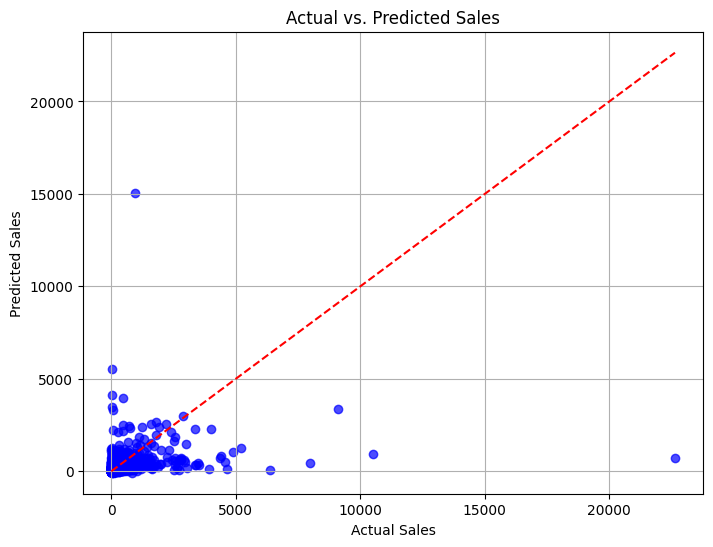

In [17]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.7, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # reference line
plt.xlabel("Actual Sales")
plt.ylabel("Predicted Sales")
plt.title("Actual vs. Predicted Sales")
plt.grid(True)
plt.show()

In [18]:
residuals = y_test - y_pred

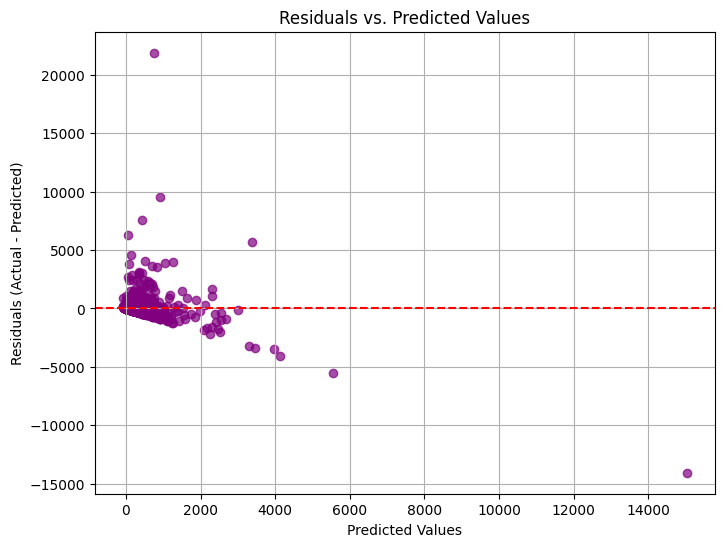

In [19]:
plt.figure(figsize=(8, 6))
plt.scatter(y_pred, residuals, alpha=0.7, color='purple')
plt.axhline(y=0, color='red', linestyle='--')  # reference line at zero
plt.xlabel("Predicted Values")
plt.ylabel("Residuals (Actual - Predicted)")
plt.title("Residuals vs. Predicted Values")
plt.grid(True)
plt.show()